<a href="https://colab.research.google.com/github/AaronReichert/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [71]:
# TODO - code!
false_posative_rate=.08
true_posative_rate=1
drunk_drivers=1/1000
breathalizer_tests_taken=0
while breathalizer_tests_taken <5:
  breathalizer_tests_taken+=1
  chance_posative_is_true=(true_posative_rate*drunk_drivers)/((true_posative_rate*drunk_drivers)+(false_posative_rate*(1-drunk_drivers)))
  print('after',breathalizer_tests_taken,'failed breathalizer tests the chance it is a true posative is',f'{chance_posative_is_true:.3%}')
  drunk_drivers=chance_posative_is_true

after 1 failed breathalizer tests the chance it is a true posative is 1.236%
after 2 failed breathalizer tests the chance it is a true posative is 13.525%
after 3 failed breathalizer tests the chance it is a true posative is 66.160%
after 4 failed breathalizer tests the chance it is a true posative is 96.069%
after 5 failed breathalizer tests the chance it is a true posative is 99.674%


In [72]:
false_posative_rate=.08
true_posative_rate=1
drunk_drivers=1
sober_drivers=999
breathalizer_tests_taken=0
while breathalizer_tests_taken <5:
  breathalizer_tests_taken+=1
  chance_posative_is_true=(true_posative_rate*drunk_drivers)/((true_posative_rate*drunk_drivers)+((false_posative_rate**breathalizer_tests_taken)*sober_drivers))
  print('after',breathalizer_tests_taken,'failed breathalizer tests the chance it is a true posative is',f'{chance_posative_is_true:.3%}')

after 1 failed breathalizer tests the chance it is a true posative is 1.236%
after 2 failed breathalizer tests the chance it is a true posative is 13.525%
after 3 failed breathalizer tests the chance it is a true posative is 66.160%
after 4 failed breathalizer tests the chance it is a true posative is 96.069%
after 5 failed breathalizer tests the chance it is a true posative is 99.674%


In [73]:
false_posative_rate=.08
prob_drunk_prior=1/1000


def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  return(prob_drunk_prior/(prob_drunk_prior+(false_positive_rate*(1-prob_drunk_prior))))

print(f'{prob_drunk_given_positive(1/1000,.08):.3%}')
print(f'{prob_drunk_given_positive((prob_drunk_given_positive(1/1000,.08)),.08):.3%}')
print(f'{prob_drunk_given_positive((prob_drunk_given_positive(prob_drunk_given_positive(1/1000,.08),.08)),.08):.3%}')
print(f'{prob_drunk_given_positive((prob_drunk_given_positive(prob_drunk_given_positive(prob_drunk_given_positive(1/1000,.08),.08),.08)),.08):.3%}')
print(f'{prob_drunk_given_positive((prob_drunk_given_positive(prob_drunk_given_positive(prob_drunk_given_positive(prob_drunk_given_positive(1/1000,.08),.08),.08),.08)),.08):.3%}')


1.236%
13.525%
66.160%
96.069%
99.674%


### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)



In [87]:
from scipy.stats import bayes_mvs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.pyplot import errorbar
from scipy import stats

url='https://raw.githubusercontent.com/fivethirtyeight/data/master/fight-songs/fight-songs.csv'

fight_songs_pd=pd.read_csv(url)
fight_songs_pd.head()

,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
0,Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908,No,Yes,No,152,64,Yes,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
1,Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947,Yes,Yes,No,76,99,Yes,4,Yes,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
2,Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930,Yes,Yes,No,155,55,Yes,5,No,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
3,Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912,Yes,Yes,No,137,62,No,0,No,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
4,Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927,Yes,Yes,No,80,67,Yes,6,Yes,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm


In [75]:
songs=fight_songs_pd[['trope_count','school','bpm','sec_duration']]

songs.head()

,trope_count,school,bpm,sec_duration
0,6,Notre Dame,152,64
1,5,Baylor,76,99
2,4,Iowa State,155,55
3,3,Kansas,137,62
4,3,Kansas State,80,67


TypeError: ignored

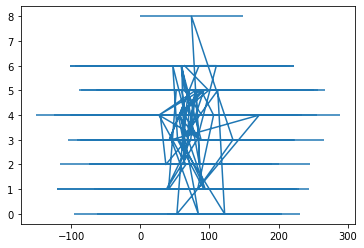

In [78]:
# nope
errorbar(songs['sec_duration'],songs['trope_count'],songs['school'],songs['bpm']);

TypeError: ignored

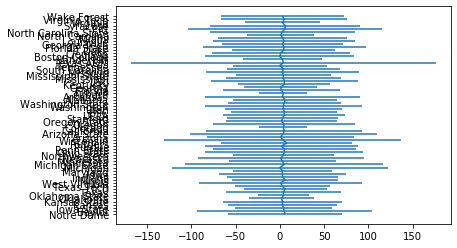

In [79]:
# wrong
errorbar(songs['trope_count'],songs['school'],songs['bpm'],songs['sec_duration']);

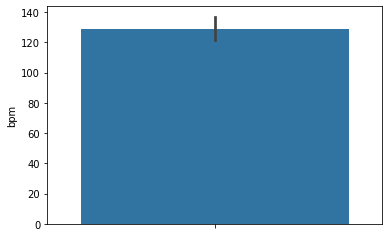

In [80]:
sns.barplot(songs['bpm'],orient='v')

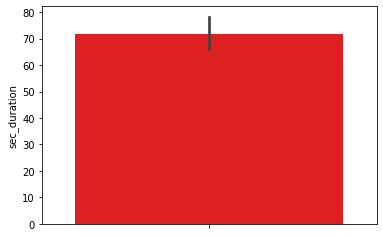

In [89]:
sns.barplot(songs['sec_duration'],orient='v',color='r')

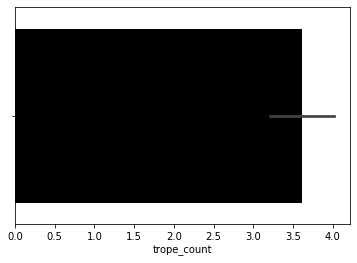

In [82]:
sns.barplot(songs['trope_count'],color='k')

In [0]:
def confidence(data):
  return(stats.t.interval(.95,len(data),loc=np.mean(data),scale=stats.sem(data)))


In [0]:
# using frenquentincy
def graph_this(input):
  sns.kdeplot(input)
  plt.axvline(x=confidence(input)[0],color='r')
  plt.axvline(x=confidence(input)[1],color='r')
  plt.axvline(x=np.mean(input),color='k')

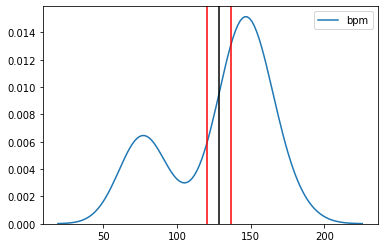

In [115]:
graph_this(songs['bpm'])

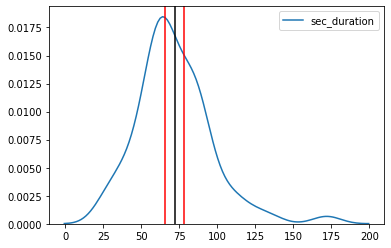

In [116]:
graph_this(songs['sec_duration'])

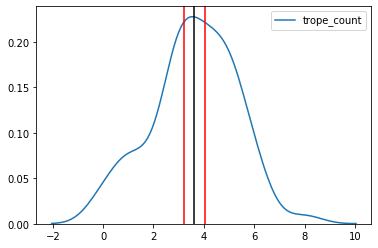

In [117]:
graph_this(songs['trope_count'])

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

In [0]:
# frequentist statistics guess standard deviation based on data spread and data length
# bayesian statistics look at the likelyhood of something being true as well as the size of the pool from witch it can be true to make statistical predictions

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!